# SOUTH GERMAN CREDIT RISK PREDICTION

#Importing Data

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_des=pd.read_csv("/content/DataDescription.csv")
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")


In [ ]:
data_des.head()

,Column Name,Variable Name,Content
0,laufkont,status,status of the debtor's checking account with t...
1,laufzeit,duration,credit duration in months (quantitative)
2,moral,credit_history,history of compliance with previous or concurr...
3,verw,purpose,purpose for which the credit is needed (catego...
4,hoehe,amount,credit amount in DM (quantitative; result of m...


In [ ]:
train.head()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [ ]:
test.head()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,4,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,2,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,4,3,23,3,1,2,2,2,1,2
2,18,2,36,4,3,2337,1,5,4,3,...,4,1,36,3,2,1,3,2,1,2
3,20,1,6,4,0,3676,1,3,1,3,...,3,1,37,3,1,3,3,1,1,2
4,22,2,36,2,5,2384,1,2,4,3,...,1,4,33,3,1,1,2,2,1,2


In [ ]:
data_des[["Column Name","Variable Name"]]

,Column Name,Variable Name
0,laufkont,status
1,laufzeit,duration
2,moral,credit_history
3,verw,purpose
4,hoehe,amount
5,sparkont,savings
6,beszeit,employment_duration
7,rate,installment_rate
8,famges,personal_status_sex
9,buerge,other_debtors


In [ ]:
#Renaming Data Description columns to access
data_des=data_des.rename(columns={'Column Name':'Column_Name','Variable Name':'Variable_Name'})
data_des.columns

Index(['Column_Name', 'Variable_Name', 'Content'], dtype='object')

The columns names of train and test csv files are in German for our accessibility convert the german names to english as the description given in the another csv file named DataDescription.csv

In [ ]:
#Converting the column values of the data description to dictionary to rename in train and test files
data_dict = dict(zip(data_des.Column_Name, data_des.Variable_Name))
data_dict

{'laufkont': 'status',
 'laufzeit': 'duration',
 'moral': 'credit_history',
 'verw': 'purpose',
 'hoehe': 'amount',
 'sparkont': 'savings',
 'beszeit': 'employment_duration',
 'rate': 'installment_rate',
 'famges': 'personal_status_sex',
 'buerge': 'other_debtors',
 'wohnzeit': 'present_residence',
 'verm': 'property',
 'alter': 'age',
 'weitkred': 'other_installment_plans',
 'wohn': 'housing',
 'bishkred': 'number_credits',
 'beruf': 'job',
 'pers': 'people_liable',
 'telef': 'telephone',
 'gastarb': 'foreign_worker',
 'kredit': 'credit_risk'}

#Data Cleaning

In [ ]:
test_df=test.rename(data_dict, axis='columns')
test_df

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,4,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,2,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,4,3,23,3,1,2,2,2,1,2
2,18,2,36,4,3,2337,1,5,4,3,...,4,1,36,3,2,1,3,2,1,2
3,20,1,6,4,0,3676,1,3,1,3,...,3,1,37,3,1,3,3,1,1,2
4,22,2,36,2,5,2384,1,2,4,3,...,1,4,33,3,1,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,982,2,48,4,2,5096,1,3,2,2,...,3,3,30,3,2,1,4,2,2,2
196,984,1,48,2,3,6999,1,4,1,4,...,1,1,34,3,2,2,3,2,2,2
197,988,1,18,2,0,976,1,2,1,2,...,2,3,23,3,2,1,2,2,1,2
198,995,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,1,1,2


In [ ]:
train_df=train.rename(data_dict,axis='columns')
train_df

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,993,1,18,4,0,3966,1,5,1,2,...,1,33,1,1,3,3,2,2,2,0
796,994,1,12,0,3,6199,1,3,4,3,...,2,28,3,1,2,3,2,2,2,0
797,997,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,2,2,2,0
798,998,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,2,2,2,0


In [ ]:
train_df.isna().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
test_df.isna().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       200 non-null    int64
 1   status                   200 non-null    int64
 2   duration                 200 non-null    int64
 3   credit_history           200 non-null    int64
 4   purpose                  200 non-null    int64
 5   amount                   200 non-null    int64
 6   savings                  200 non-null    int64
 7   employment_duration      200 non-null    int64
 8   installment_rate         200 non-null    int64
 9   personal_status_sex      200 non-null    int64
 10  other_debtors            200 non-null    int64
 11  present_residence        200 non-null    int64
 12  property                 200 non-null    int64
 13  age                      200 non-null    int64
 14  other_installment_plans  200 non-null    int64
 15  housin

In [ ]:
train_df.describe()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,478.101250,2.648750,20.496250,2.582500,2.785000,3210.290000,2.143750,3.39500,2.952500,2.687500,...,2.353750,35.542500,2.673750,1.941250,1.420000,2.901250,1.845000,1.398750,1.957500,0.750000
std,278.883661,1.250931,12.006881,1.099866,2.680533,2792.840814,1.589416,1.22407,1.134395,0.696743,...,1.057122,11.175724,0.709182,0.527396,0.586541,0.661094,0.362131,0.489947,0.201853,0.433284
min,0.000000,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,238.750000,1.750000,12.000000,2.000000,1.000000,1364.000000,1.000000,3.00000,2.000000,2.000000,...,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.750000
50%,472.000000,2.000000,18.000000,2.000000,2.000000,2264.000000,1.000000,3.00000,3.000000,3.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,707.250000,4.000000,24.000000,4.000000,3.000000,3907.250000,3.000000,5.00000,4.000000,3.000000,...,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,999.000000,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.00000,4.000000,4.000000,...,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
test_df.describe()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,585.095000,2.290000,22.530000,2.395000,3.000000,3515.080000,1.950,3.340000,3.055000,2.660000,...,2.925000,2.375000,35.540000,2.68000,1.875000,1.355000,2.915000,1.845000,1.425000,1.985000
std,311.895834,1.246462,12.158877,1.001995,2.987411,2933.884667,1.536,1.144969,1.052384,0.753151,...,1.116066,1.024511,12.063834,0.69282,0.539286,0.538913,0.624278,0.362813,0.495584,0.121857
min,4.000000,1.000000,6.000000,0.000000,0.000000,338.000000,1.000,1.000000,1.000000,1.000000,...,1.000000,1.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,303.000000,1.000000,12.000000,2.000000,1.000000,1373.500000,1.000,3.000000,2.000000,2.000000,...,2.000000,1.000000,26.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,661.000000,2.000000,19.000000,2.000000,2.000000,2443.000000,1.000,3.000000,3.000000,3.000000,...,3.000000,2.000000,33.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,857.500000,4.000000,30.000000,3.000000,3.000000,4572.500000,2.250,4.000000,4.000000,3.000000,...,4.000000,3.000000,41.250000,3.00000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,996.000000,4.000000,60.000000,4.000000,10.000000,14896.000000,5.000,5.000000,4.000000,4.000000,...,4.000000,4.000000,75.000000,3.00000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

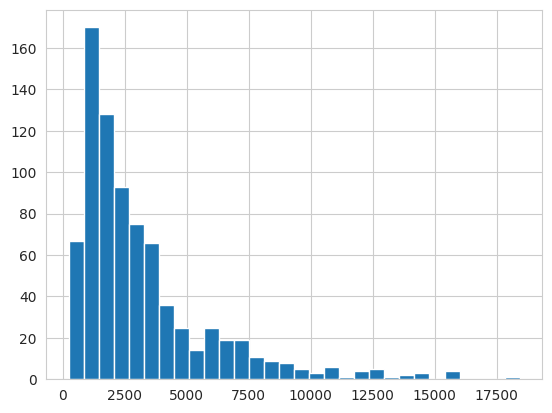

In [ ]:
plt.hist(train_df['amount'],bins=30);

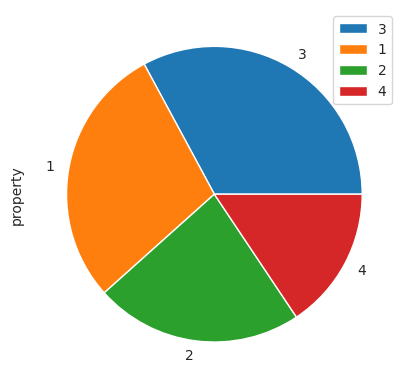

In [ ]:
train_df["property"].value_counts().plot(kind='pie')
plt.legend(train_df["property"].value_counts().index)

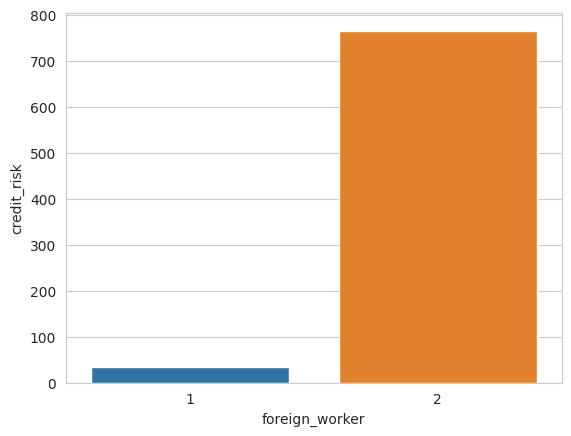

In [ ]:
sns.set_style("whitegrid")
ax=sns.barplot(x='foreign_worker',y='credit_risk',data=train_df,estimator=len)

#Data Preprocessing

In [ ]:
x = train_df.drop(columns=["credit_risk","Id"],axis=1)
y = train_df["credit_risk"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
stand_scale = StandardScaler()
x_train = stand_scale.fit_transform(x_train)
x_test = stand_scale.fit_transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 20)
(240, 20)
(560,)
(240,)


#MODELS

## Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [ ]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.775

In [ ]:
logistic_cls_rep = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
logistic_cls_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.678571,0.787736,0.775,0.733154,0.758625
recall,0.296875,0.948864,0.775,0.622869,0.775000
f1-score,0.413043,0.860825,0.775,0.636934,0.741416
support,64.000000,176.000000,0.775,240.000000,240.000000


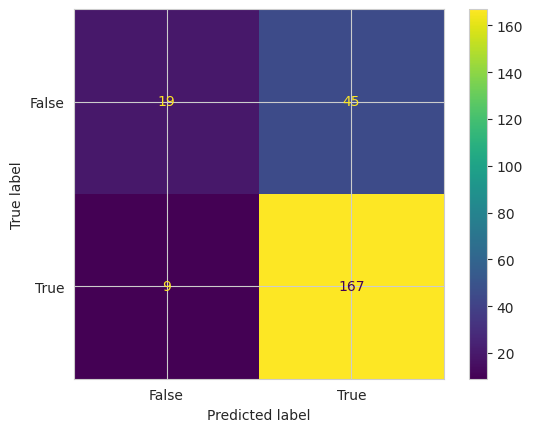

In [ ]:
from sklearn import metrics
con_mat_log = metrics.confusion_matrix(y_test, y_pred)
cm_display_log = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat_log, display_labels = [False, True])
cm_display_log.plot()
plt.show()

##SUPPORT VECTOR MACHINE-Classifier

In [ ]:
from sklearn.svm import  SVC
from sklearn.metrics import mean_absolute_error

In [ ]:
svc = SVC().fit(x_train, y_train)

In [ ]:
y_pred_svm = svc.predict(x_test)

In [ ]:
svm_score = svc.score(x_train, y_train)
svm_mae = mean_absolute_error(y_test, y_pred)
print("Score: ", svm_score)
print("Mean Absolute Error: ",svm_mae)

Score:  0.8625
Mean Absolute Error:  0.225


In [ ]:
svm_cls_rep = pd.DataFrame(classification_report(y_test,y_pred_svm,output_dict=True))
svm_cls_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.750000,0.758772,0.758333,0.754386,0.756433
recall,0.140625,0.982955,0.758333,0.561790,0.758333
f1-score,0.236842,0.856436,0.758333,0.546639,0.691211
support,64.000000,176.000000,0.758333,240.000000,240.000000


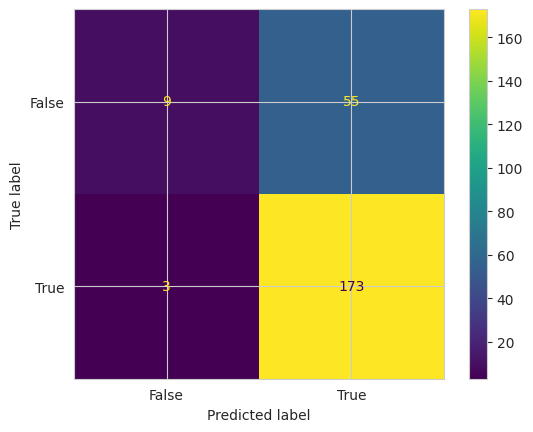

In [ ]:
from sklearn import metrics
con_mat_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cm_display_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat_svm, display_labels = [False, True])
cm_display_svm.plot()
plt.show()

## Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
navie_bayes = GaussianNB().fit(x_train, y_train)

In [ ]:
y_pred_nb = navie_bayes.predict(x_test)

In [ ]:
nb_cls_rep = pd.DataFrame(classification_report(y_test,y_pred_nb,output_dict=True))
nb_cls_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.520548,0.844311,0.745833,0.682430,0.757974
recall,0.593750,0.801136,0.745833,0.697443,0.745833
f1-score,0.554745,0.822157,0.745833,0.688451,0.750847
support,64.000000,176.000000,0.745833,240.000000,240.000000


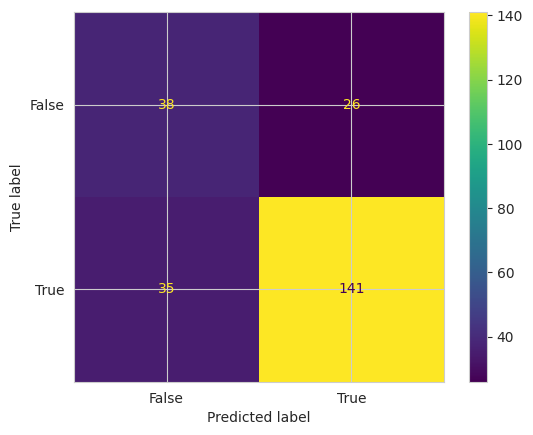

In [ ]:
from sklearn import metrics
con_mat_nb = metrics.confusion_matrix(y_test, y_pred_nb)
cm_display_nb = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat_nb, display_labels = [False, True])
cm_display_nb.plot()
plt.show()

##Decision Tree

[Text(0.609447505800464, 0.9705882352941176, 'x[0] <= -0.13\ngini = 0.368\nsamples = 560\nvalue = [136, 424]'),
 Text(0.3859483758700696, 0.9117647058823529, 'x[1] <= 0.834\ngini = 0.475\nsamples = 284\nvalue = [110, 174]'),
 Text(0.1964907192575406, 0.8529411764705882, 'x[2] <= -0.976\ngini = 0.444\nsamples = 225\nvalue = [75, 150]'),
 Text(0.05104408352668213, 0.7941176470588235, 'x[4] <= -0.355\ngini = 0.485\nsamples = 29\nvalue = [17, 12]'),
 Text(0.027842227378190254, 0.7352941176470589, 'x[3] <= 1.551\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.018561484918793503, 0.6764705882352942, 'x[16] <= 0.834\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.009280742459396751, 0.6176470588235294, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.027842227378190254, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.037122969837587005, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07424593967517401, 0.7352941176470589, 'x

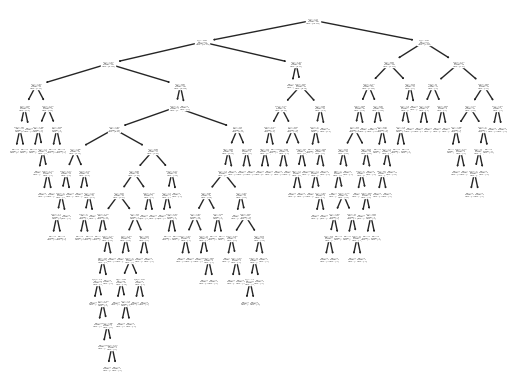

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
des_tree = DecisionTreeClassifier().fit(x_train,y_train)
plot_tree(des_tree)

In [ ]:
y_pred_des_tree = des_tree.predict(x_test)

In [ ]:
des_tree_cls_rep = pd.DataFrame(classification_report(y_test,y_pred_des_tree,output_dict=True))
des_tree_cls_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.471698,0.791444,0.720833,0.631571,0.706178
recall,0.390625,0.840909,0.720833,0.615767,0.720833
f1-score,0.427350,0.815427,0.720833,0.621389,0.711940
support,64.000000,176.000000,0.720833,240.000000,240.000000


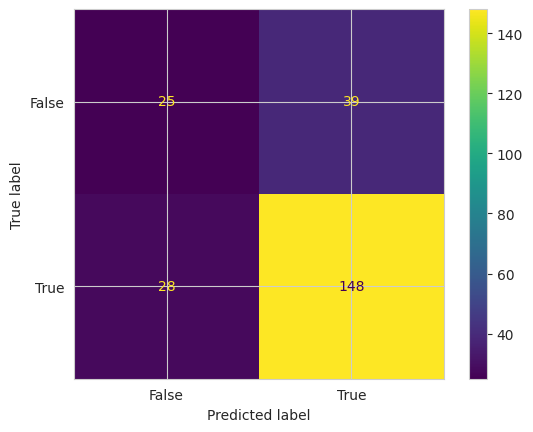

In [ ]:
from sklearn import metrics
con_mat_des_tree = metrics.confusion_matrix(y_test, y_pred_des_tree)
cm_display_des_tree = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat_des_tree, display_labels = [False, True])
cm_display_des_tree.plot()
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_forest = RandomForestClassifier().fit(x_train, y_train)

In [ ]:
y_pred_rand_forest = rand_forest.predict(x_test)

In [ ]:
rand_forest_cls_rep = pd.DataFrame(classification_report(y_test,y_pred_rand_forest,output_dict=True))
rand_forest_cls_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.631579,0.764706,0.754167,0.698142,0.729205
recall,0.187500,0.960227,0.754167,0.573864,0.754167
f1-score,0.289157,0.851385,0.754167,0.570271,0.701458
support,64.000000,176.000000,0.754167,240.000000,240.000000


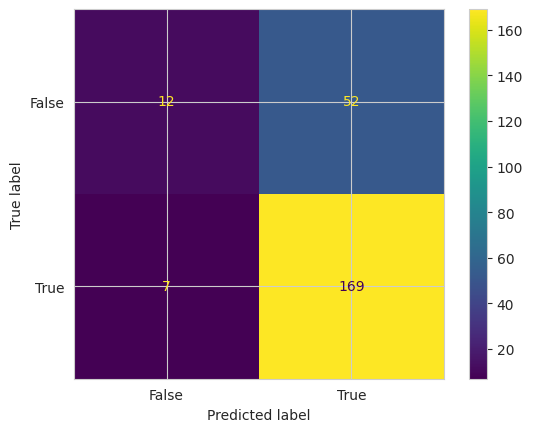

In [ ]:
from sklearn import metrics
con_mat_rand_forest = metrics.confusion_matrix(y_test, y_pred_rand_forest)
cm_display_rand_forest = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat_rand_forest, display_labels = [False, True])
cm_display_rand_forest.plot()
plt.show()

##Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
ext_clas = ExtraTreesClassifier().fit(x_train, y_train)
y_pred_ext_clf = ext_clas.predict(x_test)

In [ ]:
ext_clf_cls_rep = pd.DataFrame(classification_report(y_test,y_pred_ext_clf,output_dict=True))
ext_clf_cls_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.727273,0.779817,0.775,0.753545,0.765805
recall,0.250000,0.965909,0.775,0.607955,0.775000
f1-score,0.372093,0.862944,0.775,0.617519,0.732051
support,64.000000,176.000000,0.775,240.000000,240.000000


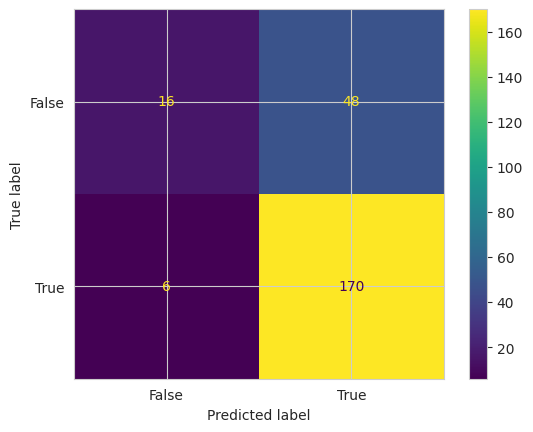

In [ ]:
from sklearn import metrics
con_mat_ext_clf = metrics.confusion_matrix(y_test, y_pred_ext_clf)
cm_display_ext_clf = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat_ext_clf, display_labels = [False, True])
cm_display_ext_clf.plot()
plt.show()

#Over View

In [ ]:
models=[logistic_cls_rep,svm_cls_rep,nb_cls_rep,des_tree_cls_rep,rand_forest_cls_rep,ext_clf_cls_rep]
report_over_view = pd.concat(models, keys=['LOGISTIC REGRESSION','SUPPORT VECTOR MACHINE Classifier','NAVIE BAYES','DECISION TREE','RANDOM FOREST','EXTRA TREE CLASSIFIER'])
report_over_view

0           1  accuracy  \
LOGISTIC REGRESSION               precision   0.678571    0.787736  0.775000   
                                  recall      0.296875    0.948864  0.775000   
                                  f1-score    0.413043    0.860825  0.775000   
                                  support    64.000000  176.000000  0.775000   
SUPPORT VECTOR MACHINE Classifier precision   0.750000    0.758772  0.758333   
                                  recall      0.140625    0.982955  0.758333   
                                  f1-score    0.236842    0.856436  0.758333   
                                  support    64.000000  176.000000  0.758333   
NAVIE BAYES                       precision   0.520548    0.844311  0.745833   
                                  recall      0.593750    0.801136  0.745833   
                                  f1-score    0.554745    0.822157  0.745833   
                                  support    64.000000  176.000000  0.745833   
DECISION TREE                     precision   0.471698    0.791444  0.720833   
                                  recall      0.390625    0.840909  0.720833   
                                  f1-score    0.427350    0.815427  0.720833   
                                  support    64.000000  176.000000  0.720833   
RANDOM FOREST                     precision   0.631579    0.764706  0.754167   
                                  recall      0.187500    0.960227  0.754167   
                                  f1-score    0.289157    0.851385  0.754167   
                                  support    64.000000  176.000000  0.754167   
EXTRA TREE CLASSIFIER             precision   0.727273    0.779817  0.775000   
                                  recall      0.250000    0.965909  0.775000   
                                  f1-score    0.372093    0.862944  0.775000   
                                  support    64.000000  176.000000  0.775000   

                                              macro avg  weighted avg  
LOGISTIC REGRESSION               precision    0.733154      0.758625  
                                  recall       0.622869      0.775000  
                                  f1-score     0.636934      0.741416  
                                  support    240.000000    240.000000  
SUPPORT VECTOR MACHINE Classifier precision    0.754386      0.756433  
                                  recall       0.561790      0.758333  
                                  f1-score     0.546639      0.691211  
                                  support    240.000000    240.000000  
NAVIE BAYES                       precision    0.682430      0.757974  
                                  recall       0.697443      0.745833  
                                  f1-score     0.688451      0.750847  
                                  support    240.000000    240.000000  
DECISION TREE                     precision    0.631571      0.706178  
                                  recall       0.615767      0.720833  
                                  f1-score     0.621389      0.711940  
                                  support    240.000000    240.000000  
RANDOM FOREST                     precision    0.698142      0.729205  
                                  recall       0.573864      0.754167  
                                  f1-score     0.570271      0.701458  
                                  support    240.000000    240.000000  
EXTRA TREE CLASSIFIER             precision    0.753545      0.765805  
                                  recall       0.607955      0.775000  
                                  f1-score     0.617519      0.732051  
                                  support    240.000000    240.000000